In [1]:
import datetime
import matplotlib.pyplot as plt
from pandas_highcharts.display import display_charts

import sys
sys.path.append(r'../stock_plot')
import stock_plot as sp

import util
import golden_core30
import buy_and_hold
import rating_trade
import nikkei_tsumitate_trade
%reload_ext autoreload
%autoreload 2

## 終値の5日と25日線でゴールデンクロス発生した次の日に、始値でその銘柄を最低の単元数だけ買い、デッドクロスの次の日にその銘柄を全数初値で売るのを繰り返す

### 任天堂だけ
- チャート確認

,open,high,low,close,volume
date,,,,,
2010-04-02,32200.0,32200.0,31750.0,32100.0,25500.0
2010-04-05,32550.0,32950.0,32400.0,32950.0,36600.0
2010-04-06,32800.0,32850.0,31950.0,32350.0,34400.0
2010-04-07,32150.0,32200.0,31550.0,31550.0,39300.0
2010-04-08,30950.0,31150.0,30600.0,30700.0,34900.0


2010-06-18:GOLDEN CROSS: 28420.0 yen/1stock
2010-06-30:DEAD CROSS: 26110.0 yen/1stock
2010-07-06:GOLDEN CROSS: 26480.0 yen/1stock
2010-07-12:DEAD CROSS: 25560.0 yen/1stock
2010-09-01:GOLDEN CROSS: 23410.0 yen/1stock
2010-09-06:DEAD CROSS: 23600.0 yen/1stock
2010-09-07:GOLDEN CROSS: 23370.0 yen/1stock
2010-09-08:DEAD CROSS: 23100.0 yen/1stock
2010-09-16:GOLDEN CROSS: 23610.0 yen/1stock
2010-09-30:DEAD CROSS: 20820.0 yen/1stock
2010-11-15:GOLDEN CROSS: 21450.0 yen/1stock
2011-01-06:DEAD CROSS: 23450.0 yen/1stock
2011-01-17:GOLDEN CROSS: 24160.0 yen/1stock
2011-01-20:DEAD CROSS: 23080.0 yen/1stock
2011-02-10:GOLDEN CROSS: 24000.0 yen/1stock
2011-03-04:DEAD CROSS: 23350.0 yen/1stock
2011-07-08:GOLDEN CROSS: 16430.0 yen/1stock
2011-07-19:DEAD CROSS: 14670.0 yen/1stock
2011-08-25:GOLDEN CROSS: 12640.0 yen/1stock
2011-09-15:DEAD CROSS: 11880.0 yen/1stock
2011-10-18:GOLDEN CROSS: 12000.0 yen/1stock
2011-10-26:DEAD CROSS: 11240.0 yen/1stock
2011-11-04:GOLDEN CROSS: 11850.0 yen/1stock
2011-11-21

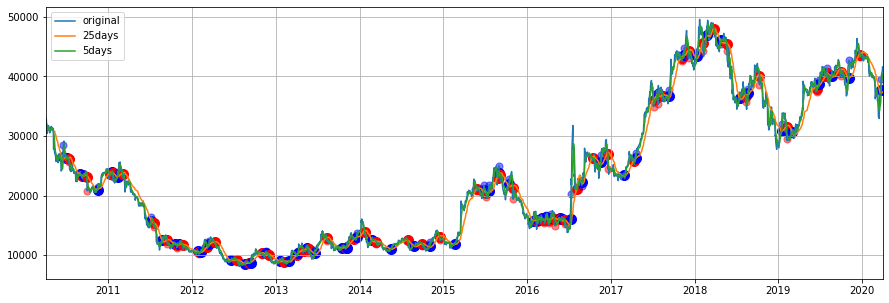

In [10]:
# 任天堂
code = 7974
df = util.fetch_prices_to_df(code)
# df.info()

# 期間指定
start_date = datetime.datetime(2010, 4, 1)
end_date = datetime.datetime(2020, 4, 1)
df = df[start_date < df.index]
df = df[df.index < end_date]
display(df.head())

# ゴールデンクロス確認
fig = sp.matplotlib_moving_average_line(df, 'close', figsize=(15, 5), short=5, long=25)
plt.show()

# 移動平均線確認
df['5MA'] = df['close'].rolling(window=5).mean()
df['25MA'] = df['close'].rolling(window=25).mean()
display_charts(df[['close', '5MA', '25MA']], chart_type='stock')

- 結果は+6万円ぐらい

In [11]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
end_date = datetime.date(2020, 4, 1)

# 任天堂
code_list = (7974, )

# 開始時の所持金
deposit = 1000000

# ゴールデンクロス時の最小購入金額
order_under_limit = deposit // 10

# ゴールデンクロス買い、売りシグナルであるデッドクロス売るシミュレーション実行
portfolio, result = golden_core30.simulate_golden_dead_cross(db_file_name,
                                                             start_date, end_date,
                                                             code_list,
                                                             deposit,
                                                             order_under_limit)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2012-06-21 BUY code:7974 count:100 price:9380.0 deposit:1000000 -> 61475
2012-07-17 SELL code:7974 count:100 price:8990.0 deposit:61475 -> 959950
2012-08-20 BUY code:7974 count:100 price:8760.0 deposit:959950 -> 83425
2012-09-10 SELL code:7974 count:100 price:8650.0 deposit:83425 -> 947900
2012-09-13 BUY code:7974 count:100 price:9090.0 deposit:947900 -> 38375
2012-10-31 SELL code:7974 count:100 price:10180.0 deposit:38375 -> 1044468
2013-01-18 BUY code:7974 count:100 price:9550.0 deposit:1044468 -> 88943
2013-02-06 SELL code:7974 count:100 price:8790.0 deposit:88943 -> 978697
2013-02-28 BUY code:7974 count:100 price:8950.0 deposit:978697 -> 83172
2013-04-04 SELL code:7974 count:100 price:9800.0 deposit:83172 -> 1049997


,price,profit
2020-03-30,1049997.0,49997.0
2020-03-31,1049997.0,49997.0
2020-04-01,1049997.0,49997.0



現在の預り金: 1049997
投資総額: 1000000
総利益（税引き前）: 62272
（源泉徴収)税金合計: 12650
手数料合計: 5353
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 2.01 s


### TOPIX Core30に連動するETF:MAXIS トピックス･コア30上場投信だけ
- 結果は+2万円ぐらい

In [24]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
end_date = datetime.date(2020, 4, 1)

# 任天堂
code_list = (1344, )

# 開始時の所持金
deposit = 1000000

# ゴールデンクロス時の最小購入金額
order_under_limit = deposit // 10

# ゴールデンクロス買い、売りシグナルであるデッドクロス売るシミュレーション実行
portfolio, result = golden_core30.simulate_golden_dead_cross(db_file_name,
                                                             start_date, end_date,
                                                             code_list,
                                                             deposit,
                                                             order_under_limit)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2010-06-22 BUY code:1344 count:200 price:495.0 deposit:1000000 -> 900903
2010-06-28 SELL code:1344 count:200 price:480.0 deposit:900903 -> 996806
2010-08-04 BUY code:1344 count:210 price:464.0 deposit:996806 -> 899269
2010-08-13 SELL code:1344 count:210 price:454.0 deposit:899269 -> 994512
2010-09-13 BUY code:1344 count:210 price:458.0 deposit:994512 -> 898235
2010-10-06 SELL code:1344 count:210 price:458.0 deposit:898235 -> 994318
2010-10-12 BUY code:1344 count:210 price:466.0 deposit:994318 -> 896361
2010-10-14 SELL code:1344 count:210 price:459.0 deposit:896361 -> 992654
2010-11-11 BUY code:1344 count:210 price:473.0 deposit:992654 -> 893227
2011-02-02 SELL code:1344 count:210 price:505.0 deposit:893227 -> 999164
2011-02-08 BUY code:1344 count:190 price:517.0 deposit:999164 -> 900837
2011-03-09 SELL code:1344 count:190 price:525.0 deposit:900837 -> 1000490
2011-05-10 BUY code:1344 count:210 price:465.0 deposit:1000490 -> 902743
2011-05-17 SELL code:1344 count:210 price:452.0 deposit

,price,profit
2020-03-30,1021337.0,21337.0
2020-03-31,1021337.0,21337.0
2020-04-01,1021337.0,21337.0



現在の預り金: 1021337
投資総額: 1000000
総利益（税引き前）: 21284
（源泉徴収)税金合計: 4323
手数料合計: 12220
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 2.5 s


### TOPIX Core30 の30銘柄
#### 下記コードはコマンドラインでも実行できる
```
$ activate stock
$ python golden_core30.py
```
- 結果は+49万円ぐらい

In [13]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
#end_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2018, 4, 1)

# TOPIX Core30
code_list = (
    2914, 3382, 4063, 4452, 4502, 4503, 4568, 6098, 6501, 6758, 
    6861, 6954, 6981, 7203, 7267, 7751, 7974, 8031, 8058, 8306, 
    8316, 8411, 8766, 8802, 9020, 9022, 9432, 9433, 9437, 9984)

# 開始時の所持金
deposit = 1000000

# ゴールデンクロス時の最小購入金額
order_under_limit = deposit // 10

# ゴールデンクロス買い、売りシグナルであるデッドクロス売るシミュレーション実行
portfolio, result = golden_core30.simulate_golden_dead_cross(db_file_name,
                                                             start_date, end_date,
                                                             code_list,
                                                             deposit,
                                                             order_under_limit)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2010-05-17 BUY code:9984 count:100 price:1122.0 deposit:1000000 -> 887687
2010-05-20 BUY code:4568 count:100 price:1641.0 deposit:887687 -> 723474
2010-05-24 SELL code:4568 count:100 price:1588.0 deposit:723474 -> 882161
2010-05-24 BUY code:9432 count:100 price:1885.0 deposit:882161 -> 693548
2010-05-26 SELL code:9432 count:100 price:1867.5 deposit:693548 -> 880185
2010-05-26 SELL code:9984 count:100 price:1050.0 deposit:880185 -> 985072
2010-06-02 BUY code:9984 count:100 price:1095.5 deposit:985072 -> 875409
2010-06-07 BUY code:9022 count:100 price:7590.0 deposit:875409 -> 115884
2010-06-14 SELL code:9022 count:100 price:7480.0 deposit:115884 -> 863359
2010-06-15 BUY code:9433 count:100 price:705.0 deposit:863359 -> 792762
2010-06-16 SELL code:9433 count:100 price:699.1700000000001 deposit:792762 -> 862582
2010-06-16 BUY code:2914 count:100 price:1522.5 deposit:862582 -> 710219
2010-06-17 BUY code:4452 count:100 price:2051.0 deposit:710219 -> 504849
2010-06-17 BUY code:4502 count:100 

,price,profit
2018-03-28,1474449.0,474449.0
2018-03-29,1493749.0,493749.0
2018-03-30,1491885.0,491885.0



現在の預り金: 1491885
投資総額: 1000000
総利益（税引き前）: 580814
（源泉徴収)税金合計: 117992
手数料合計: 168539
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 2.73 s


## 1銘柄について、開始日に購入後持ち続けて最終日に売る


### 任天堂だけ
- 任天堂は高すぎて開始日に買えず

In [23]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
end_date = datetime.date(2020, 4, 1)

# 任天堂
code = 7974

# 開始時の所持金
deposit = 1000000

# 1銘柄について、購入後持ち続けて最終日に売るシミュレーション実行
portfolio, result = buy_and_hold.simulate_buy_and_hold(db_file_name,
                                                       start_date, end_date,
                                                       deposit, 
                                                       code)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

,price,profit
2020-03-30,1000000,0
2020-03-31,1000000,0
2020-04-01,1000000,0



現在の預り金: 1000000
投資総額: 1000000
総利益（税引き前）: 0
（源泉徴収)税金合計: 0
手数料合計: 0
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 2 s


### TOPIX Core30に連動するETF:MAXIS トピックス･コア30上場投信
#### 下記コードはコマンドラインでも実行できる
```
$ activate stock
$ python buy_and_hold.py
```
- TOPIX Core30のゴールデンクロスのシュミレーションは+49万円に対して、この場合は+27万円

#### 

In [22]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
#end_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2018, 4, 1)

# TOPIX Core30に連動するETF:MAXIS トピックス･コア30上場投信
code = 1344

# 開始時の所持金
deposit = 1000000

# 1銘柄について、購入後持ち続けて最終日に売るシミュレーション実行
portfolio, result = buy_and_hold.simulate_buy_and_hold(db_file_name,
                                                       start_date, end_date,
                                                       deposit, 
                                                       code)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2010-04-02 BUY code:1344 count:1750 price:571.0 deposit:1000000 -> 225
2018-03-30 SELL code:1344 count:1750 price:731.0 deposit:225 -> 1222449


,price,profit
2018-03-28,1267225.0,267225.0
2018-03-29,1274225.0,274225.0
2018-03-30,1222449.0,222449.0



現在の預り金: 1222449
投資総額: 1000000
総利益（税引き前）: 277622
（源泉徴収)税金合計: 56398
手数料合計: 1153
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 2.06 s


## 毎月入金しながら目標株価をみて株を売買

### 証券会社のレーティング情報の株価 >= 現在株価 * 1.2 の銘柄を買い、購入時の株価 * 1.2 以上（利確）もしくは購入時の株価 * 0.8 以下（損切り）になったら売るを繰り返す

#### 下記コードはコマンドラインでも実行できる
```
$ activate stock
$ python rating_trade.py
```
- 種銭は毎月5万円ずつ増やす
- 結果は+606万円

In [4]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
# end_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2018, 4, 1)

# 開始時の所持金
deposit = 1000000

# 毎月増やす種銭。毎月reserve円ずつ種銭を増やす
reserve = 50000

# 証券会社のレーティング情報の株価 >= 現在株価 * rating_rate の銘柄を買い
rating_rate = 1.2

# 購入時の株価 * (1+sell_buy_rate) 以上（利確）もしくは購入時の株価 * (1-sell_buy_rate) 以下（損切り）
sell_buy_rate = 0.2

# 毎月入金しながら目標株価をみて株を売買するシミュレーション実行
portfolio, result = rating_trade.simulate_rating_trade(db_file_name,
                                                       start_date, end_date,
                                                       deposit, reserve,
                                                       rating_rate=rating_rate,
                                                       sell_buy_rate=sell_buy_rate)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2010-04-02 BUY code:9605 count:200 price:4870.0 deposit:1050000 -> 75475
2010-06-07 BUY code:5232 count:100 price:1750.0 deposit:175475 -> 362
2010-06-14 SELL code:9605 count:200 price:3910.0 deposit:362 -> 781837
2010-06-15 BUY code:5801 count:100 price:4070.0 deposit:781837 -> 374567
2010-07-02 BUY code:5801 count:100 price:3750.0 deposit:424567 -> 49297
2010-08-12 BUY code:4968 count:100 price:970.0 deposit:99297 -> 2200
2010-08-26 SELL code:5801 count:200 price:3150.0 deposit:2200 -> 631675
2010-08-27 SELL code:5232 count:100 price:1410.0 deposit:631675 -> 772562
2010-08-27 BUY code:4968 count:700 price:985.0 deposit:772562 -> 82537
2010-09-02 BUY code:4968 count:100 price:1011.0 deposit:132537 -> 31324
2010-11-02 SELL code:4968 count:900 price:801.0 deposit:131324 -> 851699
2010-11-02 BUY code:6997 count:300 price:2710.0 deposit:851699 -> 38174
2010-11-12 SELL code:6997 count:300 price:3300.0 deposit:38174 -> 1027649
2010-11-15 BUY code:6590 count:300 price:2590.0 deposit:1027649 

,price,profit
2018-03-28,10545423.0,4745423.0
2018-03-29,10479723.0,4679723.0
2018-03-30,10665624.0,4865624.0



現在の預り金: 10665624
投資総額: 5800000
総利益（税引き前）: 6069949
（源泉徴収)税金合計: 1233110
手数料合計: 71266
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 17.5 s


- 種銭は毎月2万円ずつ増やしたとき
- 結果は+282万円

In [5]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
# end_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2018, 4, 1)

# 開始時の所持金
deposit = 1000000

# 毎月増やす種銭。毎月reserve円ずつ種銭を増やす
reserve = 20000

# 証券会社のレーティング情報の株価 >= 現在株価 * rating_rate の銘柄を買い
rating_rate = 1.2

# 購入時の株価 * (1+sell_buy_rate) 以上（利確）もしくは購入時の株価 * (1-sell_buy_rate) 以下（損切り）
sell_buy_rate = 0.2

# 毎月入金しながら目標株価をみて株を売買するシミュレーション実行
portfolio, result = rating_trade.simulate_rating_trade(db_file_name,
                                                       start_date, end_date,
                                                       deposit, reserve,
                                                       rating_rate=rating_rate,
                                                       sell_buy_rate=sell_buy_rate)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2010-04-02 BUY code:9605 count:200 price:4870.0 deposit:1020000 -> 45475
2010-06-14 SELL code:9605 count:200 price:3910.0 deposit:85475 -> 866950
2010-06-14 BUY code:5801 count:200 price:4060.0 deposit:866950 -> 54425
2010-08-25 SELL code:5801 count:200 price:3130.0 deposit:94425 -> 719900
2010-08-25 BUY code:4968 count:700 price:992.0 deposit:719900 -> 24975
2010-11-02 SELL code:4968 count:700 price:801.0 deposit:84975 -> 645150
2010-11-02 BUY code:6997 count:200 price:2710.0 deposit:645150 -> 102625
2010-11-12 SELL code:6997 count:200 price:3300.0 deposit:102625 -> 762100
2010-11-12 BUY code:6590 count:200 price:2650.0 deposit:762100 -> 231575
2010-11-30 BUY code:5232 count:100 price:1910.0 deposit:231575 -> 40462
2010-12-16 SELL code:6590 count:200 price:3240.0 deposit:60462 -> 707937
2010-12-16 BUY code:9202 count:200 price:3000.0 deposit:707937 -> 107412
2011-03-16 SELL code:9202 count:200 price:2430.0 deposit:167412 -> 653142
2011-03-16 BUY code:5302 count:400 price:1580.0 deposi

,price,profit
2018-03-28,5135944.0,2215944.0
2018-03-29,5099244.0,2179244.0
2018-03-30,5184547.0,2264547.0



現在の預り金: 5184547
投資総額: 2920000
総利益（税引き前）: 2821269
（源泉徴収)税金合計: 573140
手数料合計: 68433
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 19.6 s


### 証券会社のレーティング情報の株価 >= 現在株価 * 2.0 の銘柄を買い、購入時の株価 * 1.3 以上（利確）もしくは購入時の株価 * 0.7 以下（損切り）になったら売るを繰り返す
- 種銭は毎月2万円ずつ増やす
- 結果は+144万円

In [6]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
# end_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2018, 4, 1)

# 開始時の所持金
deposit = 1000000

# 毎月増やす種銭。毎月reserve円ずつ種銭を増やす
reserve = 20000

# 証券会社のレーティング情報の株価 >= 現在株価 * rating_rate の銘柄を買い
rating_rate = 2.0

# 購入時の株価 * (1+sell_buy_rate) 以上（利確）もしくは購入時の株価 * (1-sell_buy_rate) 以下（損切り）
sell_buy_rate = 0.3

# 毎月入金しながら目標株価をみて株を売買するシミュレーション実行
portfolio, result = rating_trade.simulate_rating_trade(db_file_name,
                                                       start_date, end_date,
                                                       deposit, reserve,
                                                       rating_rate=rating_rate,
                                                       sell_buy_rate=sell_buy_rate)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2010-04-02 BUY code:9605 count:200 price:4870.0 deposit:1020000 -> 45475
2010-08-06 BUY code:4968 count:100 price:1012.0 deposit:125475 -> 24162
2010-10-22 SELL code:9605 count:200 price:3390.0 deposit:64162 -> 741637
2010-10-22 BUY code:6590 count:200 price:2780.0 deposit:741637 -> 185112
2010-11-30 BUY code:5232 count:100 price:1910.0 deposit:205112 -> 13999
2011-03-16 SELL code:4968 count:100 price:720.0 deposit:93999 -> 165902
2011-03-16 SELL code:6590 count:200 price:1920.0 deposit:165902 -> 549632
2011-03-16 BUY code:5302 count:300 price:1580.0 deposit:549632 -> 75362
2011-03-23 SELL code:5232 count:100 price:2540.0 deposit:75362 -> 329092
2011-03-23 BUY code:5302 count:100 price:2010.0 deposit:329092 -> 127822
2011-05-16 BUY code:5233 count:100 price:1570.0 deposit:167822 -> 10709
2011-06-10 SELL code:5302 count:400 price:2210.0 deposit:30709 -> 914184
2011-06-10 BUY code:8309 count:300 price:2600.0 deposit:914184 -> 133659
2011-06-28 BUY code:6703 count:100 price:690.0 deposit:

,price,profit
2018-03-28,3999088.0,1079088.0
2018-03-29,4005888.0,1085888.0
2018-03-30,4074378.0,1154378.0



現在の預り金: 4074378
投資総額: 2920000
総利益（税引き前）: 1441043
（源泉徴収)税金合計: 292747
手数料合計: 35875
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 20.3 s


## 毎月積み立てて最後に全部売る

### 銘柄コード 1321
- 種銭は毎月5万円ずつ増やす
- 結果は+402万円。目標株価で売買した方が+606万なので目標株価の結果の方がいい

In [3]:
%%time

db_file_name = r'D:\DB_Browser_for_SQLite\stock.db'

# シミュレーション期間
start_date = datetime.date(2010, 4, 1)
# end_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2018, 4, 1)

# 開始時の所持金
deposit = 1000000

# 毎月増やす種銭。毎月reserve円ずつ種銭を増やす
reserve = 50000

# 銘柄コード 1321 の「日経225連動型上場投資信託」
code = 1321

# 毎月入金しながら目標株価をみて株を売買するシミュレーション実行
portfolio, result = nikkei_tsumitate_trade.simulate_nikkei_tsumitate(db_file_name,
                                                                     start_date, end_date,
                                                                     deposit, reserve, 
                                                                     code=code)
display(result.tail(3))

print()
print('現在の預り金:', portfolio.deposit)
print('投資総額:', portfolio.amount_of_investment)
print('総利益（税引き前）:', portfolio.total_profit)
print('（源泉徴収)税金合計:', portfolio.total_tax)
print('手数料合計:', portfolio.total_fee)
print('保有銘柄 銘柄コード:', portfolio.stocks)
print()

display_charts(result[['profit']], dtype='stock')

2010-04-02 BUY code:1321 count:91 price:11480.0 deposit:1050000 -> 4692
2010-05-07 BUY code:1321 count:5 price:10420.0 deposit:54692 -> 2495
2010-06-02 BUY code:1321 count:5 price:9810.0 deposit:52495 -> 3391
2010-07-02 BUY code:1321 count:5 price:9410.0 deposit:53391 -> 6287
2010-08-03 BUY code:1321 count:5 price:9750.0 deposit:56287 -> 7483
2010-09-02 BUY code:1321 count:6 price:9110.0 deposit:57483 -> 2726
2010-10-04 BUY code:1321 count:5 price:9490.0 deposit:52726 -> 5222
2010-11-02 BUY code:1321 count:5 price:9230.0 deposit:55222 -> 9018
2010-12-02 BUY code:1321 count:5 price:10270.0 deposit:59018 -> 7571
2011-01-05 BUY code:1321 count:5 price:10480.0 deposit:57571 -> 5074
2011-02-02 BUY code:1321 count:5 price:10480.0 deposit:55074 -> 2577
2011-03-02 BUY code:1321 count:4 price:10710.0 deposit:52577 -> 9683
2011-04-04 BUY code:1321 count:5 price:9940.0 deposit:59683 -> 9929
2011-05-06 BUY code:1321 count:6 price:9950.0 deposit:59929 -> 132
2011-06-02 BUY code:1321 count:5 price:9

,price,profit
2018-03-28,9649777.0,3849777.0
2018-03-29,9707367.0,3907367.0
2018-03-30,9008127.0,3208127.0



現在の預り金: 9008127
投資総額: 5800000
総利益（税引き前）: 4025876
（源泉徴収)税金合計: 817856
手数料合計: 8687
保有銘柄 銘柄コード: defaultdict(<class 'simulator.OwnedStock'>, {})



Wall time: 2.03 s
